<a href="https://colab.research.google.com/github/Tauseef-09/The_Sparks_Foundation_Internship_Tasks/blob/main/Task_6_Prediction_Using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation

## GRIP(Graduate Rotational Internship Program) January 2023.

# Name :- Kotekanti Tauseef Taufiq

##Domain:- Data Science & Business Analytics

## **Task 6 : Prediction using machine learning algorithm**


Create the Decision Tree Classifier and visualize it graphically The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

* Dataset: : https://bit.ly/3kXTdox

---
# Table of Content


* __Step 1: Importing the Necessary Libraries__
    
* __Step 2: Data Loading__
    
* __Step 3: Basic observation of our Dataset__
    
* __Step 4: Exploring Features of our Dataset__
   
* __Step 5: Model Implementation__

* __Step 6: Conclusion__

---

---
## Importing the Necessary Libraries
---

In [26]:
# importing necessary data manuplation and data visualization libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

# importing the required model of Machine Learning which is to be implemented.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# importing warnings library to overcome unnecessary warnings.

import warnings
warnings.filterwarnings('ignore')


---
## Data Loading
---

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Loading my data

my_data = pd.read_csv("/content/drive/MyDrive/mount_data/Iris.csv")


---
## Basic Observation of our Data Set 
---

In [29]:
# Trying to know about the shape of our data set.

print(f'The number of observations in our Data set =', my_data.shape[0])
print(f'The number of features in our Data set =', my_data.shape[1])


The number of observations in our Data set = 150
The number of features in our Data set = 6


In [30]:
# Getting a glance of what kinda data present in our data set.

my_data.sample(5) 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
106,107,4.9,2.5,4.5,1.7,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
13,14,4.3,3.0,1.1,0.1,Iris-setosa
112,113,6.8,3.0,5.5,2.1,Iris-virginica
68,69,6.2,2.2,4.5,1.5,Iris-versicolor


In [31]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [32]:
# Checking for duplicate observations.

my_data.duplicated().sum()


0

In [33]:
# Dropping the duplicate observations

my_data.drop_duplicates(inplace = True)
my_data.duplicated().sum()


0

In [34]:
# Finding the number of unique types of values present in the Species column.

print(f'The no of Unique values in Species column:',my_data['Species'].nunique())
print(my_data['Species'].unique())


The no of Unique values in Species column: 3
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [35]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


## INFERENCE: 
From basic observation of our dataset we got the following insights

* 150 observations and 6 features.
* Null values are not present in our features.
* There is only 1 duplicate observations in our Dataset.


---
## Exploring Features of our Data Set
---

In [36]:
my_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

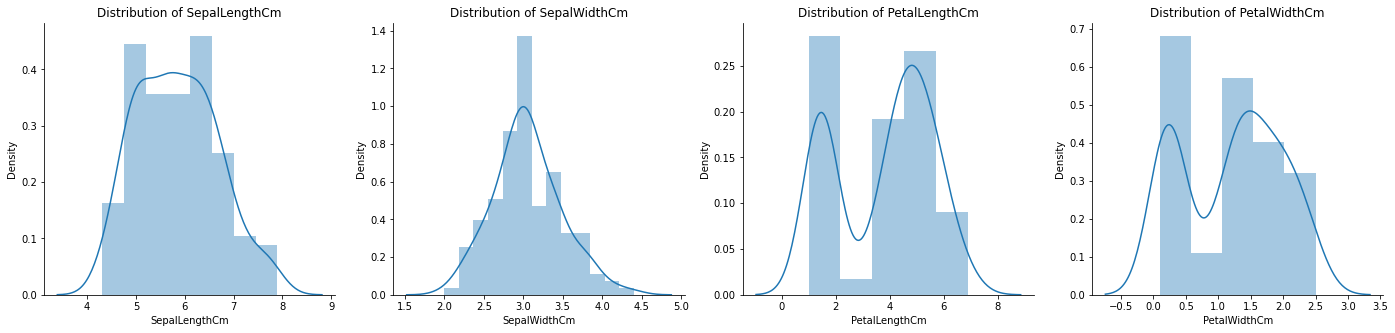

In [37]:
# Trying to check the distribution of each feature in our data set just to find some insights.

col = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt=__import__("matplotlib.pyplot")
plt.pyplot.subplots
fig, axes = plt.pyplot.subplots(nrows=1, ncols=4, figsize=(24, 5))
ax = axes.flatten()
i = 0
for co in col:

  sns.distplot(my_data[co], ax = ax[i])
  ax[i].set_title(f'Distribution of {co}')
  i += 1

sns.despine(fig)


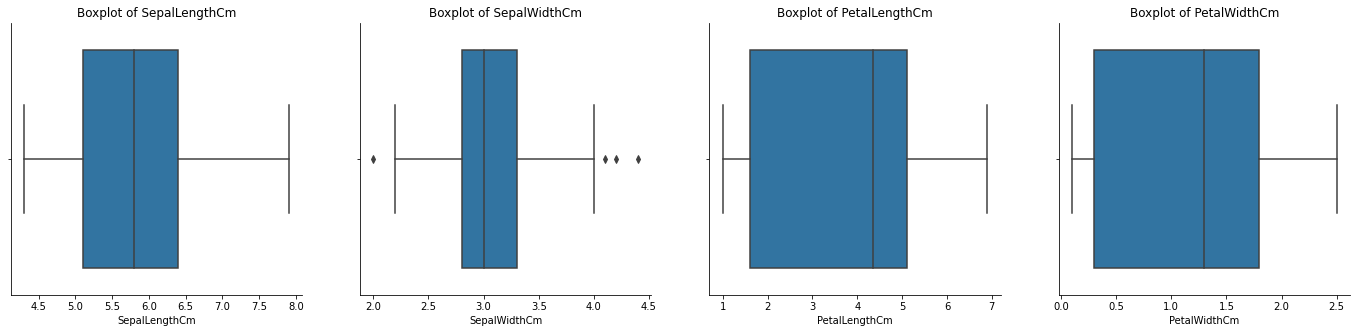

In [38]:
# Trying to check the outliers in our each feature eventhough it won't have any impact on our DecisionTreeClassifier model.

plt=__import__("matplotlib.pyplot")
plt.pyplot.subplots
fig, axes = plt.pyplot.subplots(nrows=1, ncols=4, figsize=(24, 5))
ax = axes.flatten()
i = 0
for co in col:

  sns.boxplot(my_data[co], ax = ax[i])
  ax[i].set_title(f'Boxplot of {co}')
  i += 1

sns.despine(fig)


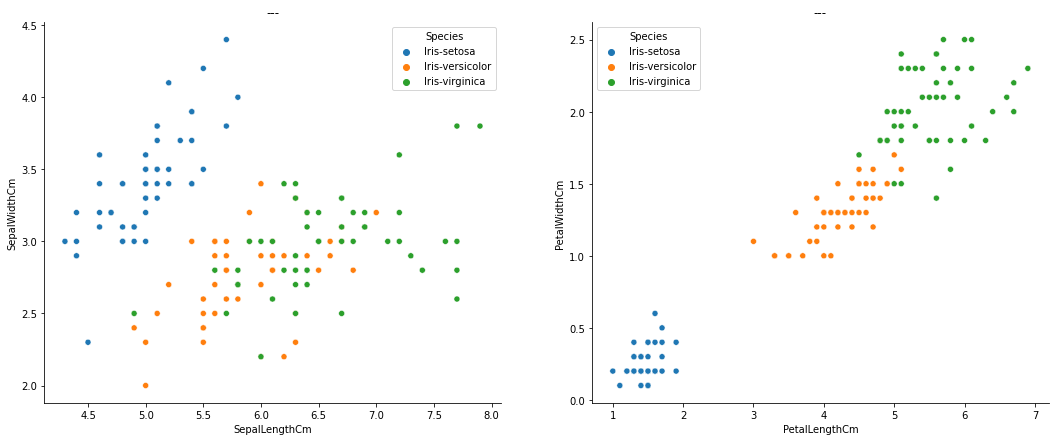

In [39]:
plt=__import__("matplotlib.pyplot")
plt.pyplot.subplots
fig, axes = plt.pyplot.subplots(nrows=1, ncols=2, figsize=(18, 7))
ax = axes.flatten()

sns.scatterplot(data = my_data, x="SepalLengthCm", y="SepalWidthCm", hue="Species", ax=ax[0])
# sns.FacetGrid(my_data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width', ax=ax[0]).add_legend()
ax[0].set_title('---')

sns.scatterplot(data = my_data, x="PetalLengthCm", y="PetalWidthCm", hue="Species", ax=ax[1])
ax[1].set_title('---')

sns.despine(fig)

## INFERENCE
Even though for Decision Tree classifier there is not much of an impact by outliers and Distribution of Data inorder to understand the behaviour of our features I have plotted the distplot and boxplot.

---
# Model Implementation
---

# What is a Decision Tree?

<b>Decision tree </b> is a type of <b>supervised learning algorithm</b> that is mostly used in classification problems. It works for both categorical and continuous input and output variables. 


### Advantages
<b>Easy to Understand:</b> Decision tree output is very easy to understand even for people from non-analytical background. It does not require any statistical knowledge to read and interpret them. Its graphical representation is very intuitive and users can easily relate their hypothesis.


<b>Useful in Data exploration: </b> Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. With the help of decision trees, we can create new variables / features that has better power to predict target variable. It can also be used in data exploration stage. For example, we are working on a problem where we have information available in hundreds of variables, there decision tree will help to identify most significant variable.
</b>Less data cleaning required:</b> It requires less data cleaning compared to some other modeling techniques. <b>It is not influenced by outliers and missing values to a fair degree.</b>


<b>Non Parametric Method:</b> Decision tree is considered to be a non-parametric method. This means that decision trees have no assumptions about the space distribution and the classifier structure.

### <b>Disadvantages</b>


<b>Over fitting:</b> Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning.

---

In [40]:
## Seperation of X and y Features

X = my_data.iloc[:,0:4]
y = my_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [41]:
# Model fitting

DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)


DecisionTreeClassifier()

In [42]:
## Prediction using Decision tree model

y_test_pred = DTC.predict(X_test)
y_train_pred = DTC.predict(X_train)
y_test_pred


array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [43]:
accuracy_score(y_test,y_test_pred)

1.0

[Text(0.6, 0.8333333333333334, 'X[0] <= 100.5\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4, 0.5, 'X[3] <= 2.45\ngini = 0.496\nsamples = 68\nvalue = [31, 37, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

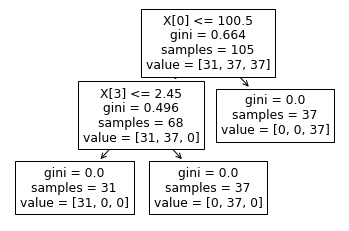

In [44]:
from sklearn.tree import plot_tree
plot_tree(DTC)

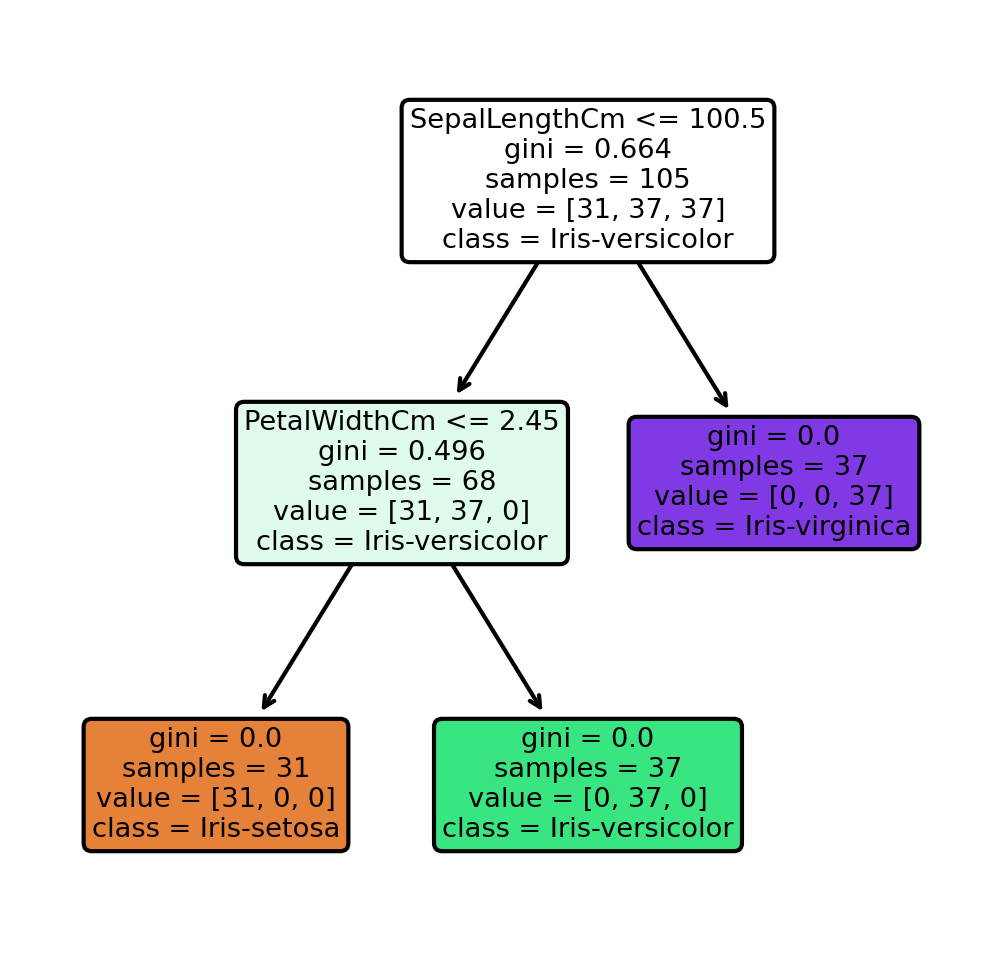

In [45]:
# Visualization

plt=__import__("matplotlib.pyplot")
plt.pyplot.subplots
feature_name = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_name = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.pyplot.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(DTC,
               feature_names = feature_name, 
               class_names=class_name,
               filled = True,
              rounded = True);
fig.savefig('dtree.png')


Classification report for Training
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        31
Iris-versicolor       1.00      1.00      1.00        37
 Iris-virginica       1.00      1.00      1.00        37

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105

Classification report for Testing
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45




[Text(0, 0.5, 'Iris-setosa'),
 Text(0, 1.5, 'Iris-versicolor'),
 Text(0, 2.5, 'Iris-virginica')]

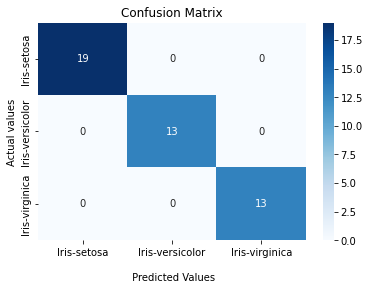

In [46]:

print('Classification report for Training')
print(classification_report(y_train, y_train_pred))
print('Classification report for Testing')
print(classification_report(y_test,y_test_pred))

conf_matrix = confusion_matrix(y_test,y_test_pred)
print()

#plotting confussion matrix
ax=sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
ax.set_xlabel('\n Predicted Values')
ax.set_ylabel('Actual values')
ax.set_title('Confusion Matrix')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Iris-setosa','Iris-versicolor','Iris-virginica'])
ax.yaxis.set_ticklabels(['Iris-setosa','Iris-versicolor','Iris-virginica'])


In [55]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_test_pred))

Accuracy Score: 1.0


In [56]:
print("Class Names = ",list(my_data['Species'].unique()) )
print('-'*69)
print('Output = ',DTC.predict([[4.7, 3.2, 1.3, 0.2]]))

Class Names =  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
---------------------------------------------------------------------
Output =  ['Iris-setosa']


## **Conclusion**

The DecisionTreeClassifier has been successfully implemented with great accuracy score and our model was able to predict accurately.



---
---